In [1]:
import pandas as pd
import numpy as np
import os
import pyedflib
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
from sklearn.model_selection import train_test_split
import mne
import matplotlib.pyplot as plt

In [2]:
data = mne.io.read_raw_bdf('eeg_recording_1.bdf')

Extracting EDF parameters from /home/v2chou/private/189/eeg_recording_1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
data

<RawEDF | eeg_recording_1.bdf, 265 x 1155328 (4513.0 s), ~248 kB, data not loaded>

In [4]:
data.info["ch_names"]

['1A1',
 '1A2',
 '1A3',
 '1A4',
 '1A5',
 '1A6',
 '1A7',
 '1A8',
 '1A9',
 '1A10',
 '1A11',
 '1A12',
 '1A13',
 '1A14',
 '1A15',
 '1A16',
 '1A17',
 '1A18',
 '1A19',
 '1A20',
 '1A21',
 '1A22',
 '1A23',
 '1A24',
 '1A25',
 '1A26',
 '1A27',
 '1A28',
 '1A29',
 '1A30',
 '1A31',
 '1A32',
 '1B1',
 '1B2',
 '1B3',
 '1B4',
 '1B5',
 '1B6',
 '1B7',
 '1B8',
 '1B9',
 '1B10',
 '1B11',
 '1B12',
 '1B13',
 '1B14',
 '1B15',
 '1B16',
 '1B17',
 '1B18',
 '1B19',
 '1B20',
 '1B21',
 '1B22',
 '1B23',
 '1B24',
 '1B25',
 '1B26',
 '1B27',
 '1B28',
 '1B29',
 '1B30',
 '1B31',
 '1B32',
 '1C1',
 '1C2',
 '1C3',
 '1C4',
 '1C5',
 '1C6',
 '1C7',
 '1C8',
 '1C9',
 '1C10',
 '1C11',
 '1C12',
 '1C13',
 '1C14',
 '1C15',
 '1C16',
 '1C17',
 '1C18',
 '1C19',
 '1C20',
 '1C21',
 '1C22',
 '1C23',
 '1C24',
 '1C25',
 '1C26',
 '1C27',
 '1C28',
 '1C29',
 '1C30',
 '1C31',
 '1C32',
 '1D1',
 '1D2',
 '1D3',
 '1D4',
 '1D5',
 '1D6',
 '1D7',
 '1D8',
 '1D9',
 '1D10',
 '1D11',
 '1D12',
 '1D13',
 '1D14',
 '1D15',
 '1D16',
 '1D17',
 '1D18',
 '1D19',
 

Using matplotlib as 2D backend.


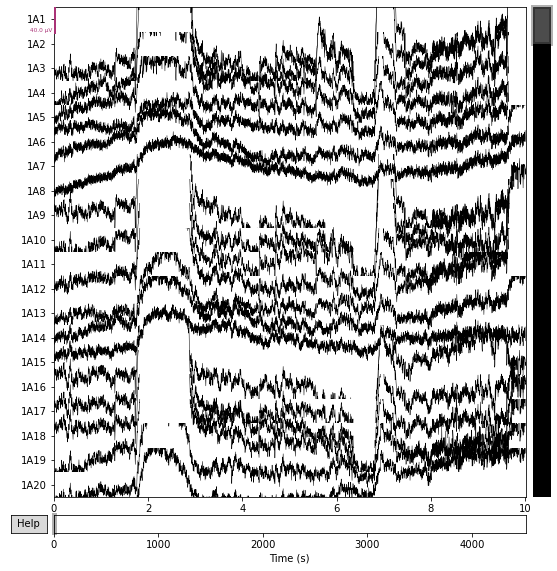

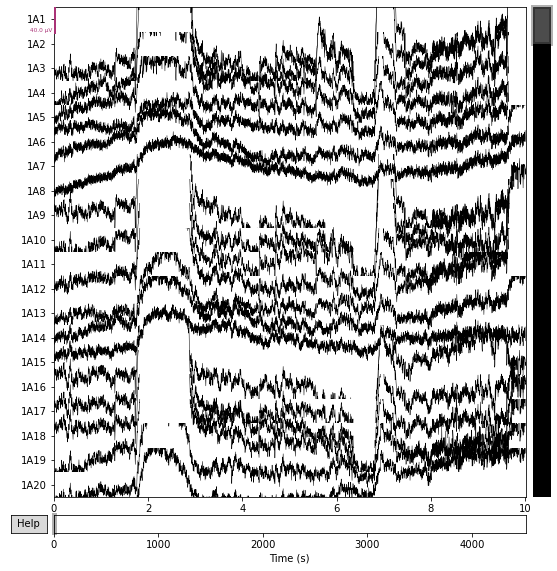

In [5]:
data.plot()

In [6]:
events = mne.find_events(data)

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
86 events found
Event IDs: [  1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  21  22  23  24  25  26  30 100]


In [7]:
# sample number in first col, event ID in last col
events_initial = mne.find_events(data, initial_event=True)
events_initial

87 events found
Event IDs: [    1     2     4     5     6     7     8     9    10    11    12    13
    14    15    16    17    18    19    21    22    23    24    25    26
    30   100 65536]


array([[      0,       0,   65536],
       [   1624,       0,       1],
       [   1724,       0,       2],
       [  27391,       0,     100],
       [  30081,       0,      30],
       [  60802,       0,       4],
       [  60872,       0,       5],
       [  78026,       0,       6],
       [  94418,       0,       7],
       [ 167492,       0,     100],
       [ 183331,       0,       8],
       [ 183365,       0,       9],
       [ 185837,       0,     100],
       [ 232446,       0,      24],
       [ 232520,       0,     100],
       [ 244703,       0,       8],
       [ 244721,       0,      10],
       [ 247193,       0,     100],
       [ 313718,       0,      24],
       [ 313765,       0,     100],
       [ 325948,       0,       8],
       [ 325967,       0,      11],
       [ 328438,       0,     100],
       [ 374616,       0,      24],
       [ 374663,       0,     100],
       [ 386845,       0,       8],
       [ 386863,       0,      12],
       [ 389336,       0,   

### Map event codes to labels

In [8]:
labels = ['button press', 'intro track', 'pre-baseline', 'intro 1a', 
          'intro 1b', 'intro 2', 'relax', 'intro 3', 'prepare', 'awe',
          'frustration', 'joy', 'anger', 'happy', 'sad', 'love', 'fear',
         'compassion', 'jealousy', 'content', 'grief', 'relief', 'excite',
         'disgust', 'return', 'post-baseline', 'thanks', 'stop']

In [9]:
event_dict = {}
for code, label in enumerate(labels):
    # relabel last event code (27) to 30 as indicated from the study
    if (code == 27):
        code = 30
    event_dict[label] = code
event_dict

{'button press': 0,
 'intro track': 1,
 'pre-baseline': 2,
 'intro 1a': 3,
 'intro 1b': 4,
 'intro 2': 5,
 'relax': 6,
 'intro 3': 7,
 'prepare': 8,
 'awe': 9,
 'frustration': 10,
 'joy': 11,
 'anger': 12,
 'happy': 13,
 'sad': 14,
 'love': 15,
 'fear': 16,
 'compassion': 17,
 'jealousy': 18,
 'content': 19,
 'grief': 20,
 'relief': 21,
 'excite': 22,
 'disgust': 23,
 'return': 24,
 'post-baseline': 25,
 'thanks': 26,
 'stop': 30}

In [10]:
# cols: event time, stim channel value before step, value after step
mne.find_stim_steps(data)

array([[    140,   65536,       0],
       [   1624,       0,       1],
       [   1627,       1,       0],
       [   1724,       0,       2],
       [   1728,       2,       0],
       [  27391,       0,     100],
       [  27394,     100,       0],
       [  30081,       0,      30],
       [  30085,      30,       0],
       [  60802,       0,       4],
       [  60805,       4,       0],
       [  60872,       0,       5],
       [  60876,       5,       0],
       [  78026,       0,       6],
       [  78030,       6,       0],
       [  94418,       0,       7],
       [  94421,       7,       0],
       [ 167492,       0,     100],
       [ 167495,     100,       0],
       [ 183331,       0,       8],
       [ 183334,       8,       0],
       [ 183365,       0,       9],
       [ 183369,       9,       0],
       [ 185837,       0,     100],
       [ 185840,     100,       0],
       [ 232446,       0,      24],
       [ 232450,      24,       0],
       [ 232520,       0,   

In [11]:
emotion_event_picks = [9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

In [12]:
# pick just the emotions (exclude instructional/logistical events)
picks = mne.pick_events(events, include=emotion_event_picks)

In [13]:
picks

array([[ 183365,       0,       9],
       [ 244721,       0,      10],
       [ 325967,       0,      11],
       [ 386863,       0,      12],
       [ 447818,       0,      13],
       [ 514411,       0,      14],
       [ 577420,       0,      15],
       [ 631924,       0,      15],
       [ 694773,       0,      17],
       [ 759624,       0,      16],
       [ 805336,       0,      19],
       [ 857678,       0,      18],
       [ 927570,       0,      21],
       [ 980802,       0,      23],
       [1045287,       0,      22]])

In [14]:
event_dict_picks = dict(list(event_dict.items())[9:24])
event_dict_picks

{'awe': 9,
 'frustration': 10,
 'joy': 11,
 'anger': 12,
 'happy': 13,
 'sad': 14,
 'love': 15,
 'fear': 16,
 'compassion': 17,
 'jealousy': 18,
 'content': 19,
 'grief': 20,
 'relief': 21,
 'excite': 22,
 'disgust': 23}

In [16]:
positive = ['awe', 'joy', 'happy', 'love', 'compassion', 'content', 'relief', 'excite']
negative = ['frustration', 'anger', 'sad', 'fear', 'jealousy', 'grief', 'disgust']

In [17]:
# remove grief since there are no labels for this event
event_dict_picks.pop('grief')
negative.remove('grief')

In [18]:
event_dict_pos = {pos: event_dict_picks[pos] for pos in positive }
event_dict_pos

{'awe': 9,
 'joy': 11,
 'happy': 13,
 'love': 15,
 'compassion': 17,
 'content': 19,
 'relief': 21,
 'excite': 22}

In [19]:
event_dict_neg = {neg: event_dict_picks[neg] for neg in negative}
event_dict_neg

{'frustration': 10,
 'anger': 12,
 'sad': 14,
 'fear': 16,
 'jealousy': 18,
 'disgust': 23}

### Visualizing events

#### Raw Events vs Time (entire recording session)

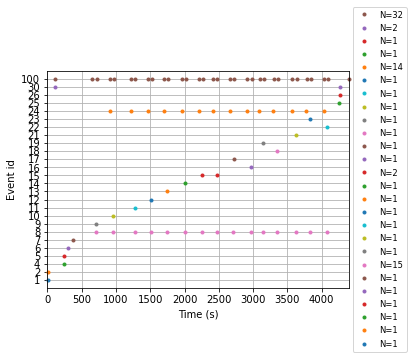

In [20]:
# Plot events to help check if event signals were properly sent to the STIM channel(s) 
fig_raw = mne.viz.plot_events(events, sfreq=data.info['sfreq'])
# fig.subplots_adjust(right=0.7)  # make room for legend

#### All Emotions vs Time

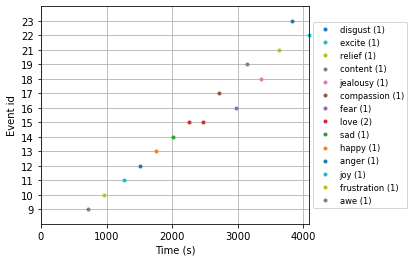

In [21]:
# visualize distribution of picked events across duration of recording (event detection works)
fig_events = mne.viz.plot_events(events, sfreq=data.info['sfreq'], event_id=event_dict_picks)

We can see from the table below that there are 15 emotional events (audio tracks) in total.

In [22]:
epochs = mne.Epochs(data, events, event_dict_picks, proj=False,
                    picks=emotion_event_picks, preload=True,
                    verbose=False)
epochs

Number of events,15
Events,anger: 1awe: 1compassion: 1content: 1disgust: 1excite: 1fear: 1frustration: 1happy: 1jealousy: 1joy: 1love: 2relief: 1sad: 1
Time range,-0.199 – 0.500 sec
Baseline,-0.199 – 0.000 sec


#### Positive Emotions vs Time

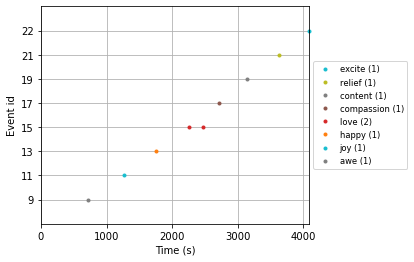

In [23]:
# visualize distribution of positive events across duration of recording (event detection works)
fig_events_pos = mne.viz.plot_events(events, sfreq=data.info['sfreq'], event_id=event_dict_pos)

There are 9 total positive emotions conducted in the session and as shown in the graph above and chart below, one of them (love) is stimulated twice.

In [24]:
# epoch all events associated with positive emotions
epochs_pos = mne.Epochs(data, events, list(event_dict_pos.values()), proj=False,
                    picks=None, preload=True, verbose=False)
epochs_pos

Number of events,9
Events,11: 113: 115: 217: 119: 121: 122: 19: 1
Time range,-0.199 – 0.500 sec
Baseline,-0.199 – 0.000 sec


#### Negative Emotions vs Time

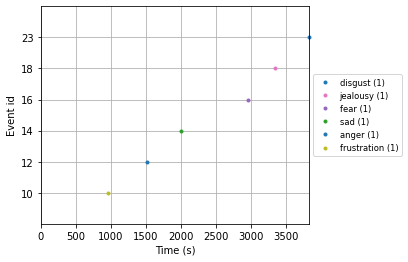

In [25]:
# visualize distribution of negative events across duration of recording (event detection works)
fig_events_neg = mne.viz.plot_events(events, sfreq=data.info['sfreq'], event_id=event_dict_neg)

There are 6 negative emotions in the session as shown in the chart below.

In [26]:
# epoch all events associated with negative emotions
epochs_neg = mne.Epochs(data, events, list(event_dict_neg.values()), proj=False,
                    picks=None, preload=True, verbose=False)
epochs_neg

Number of events,6
Events,10: 112: 114: 116: 118: 123: 1
Time range,-0.199 – 0.500 sec
Baseline,-0.199 – 0.000 sec


We can see that the positive and negative events seem to be alternating over the session.

### Segment Data into Smaller Timeframes

Not setting metadata
9 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


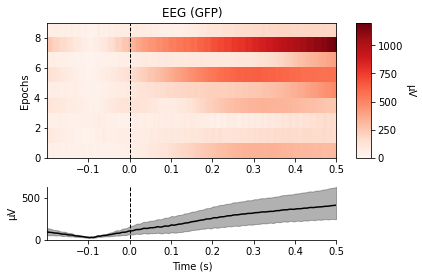

[<Figure size 432x288 with 3 Axes>]

In [33]:
epochs_pos.plot_image()

Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


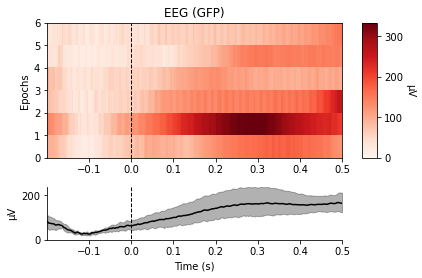

[<Figure size 432x288 with 3 Axes>]

In [32]:
epochs_neg.plot_image()

Not setting metadata
15 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


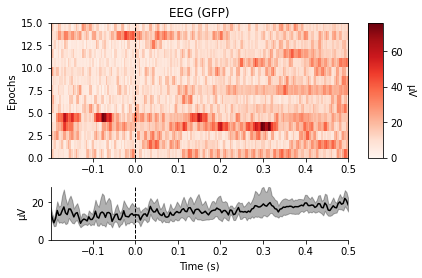

[<Figure size 432x288 with 3 Axes>]

In [31]:
epochs.plot_image()

In [ ]:
## NEXT STEPS
# segment positive events into smaller timeframes (~1600s in total assuming first event starts ~800s)

# segment negative events into smaller timeframes

# expect (1600, 265-9 channels, 256 timepoints)

# stack both matrices and flatten last 2 dimensions (3200, 256^2)

# run PCA (n_components = 50~300) --> outputs (3200, 50)

# run classifier (split into train/test)

In [91]:
X = epochs.get_data()

In [92]:
X.shape # returns (n_epochs, n_channels, n_times)

(15, 14, 180)

In [95]:
from mne.decoding import UnsupervisedSpatialFilter

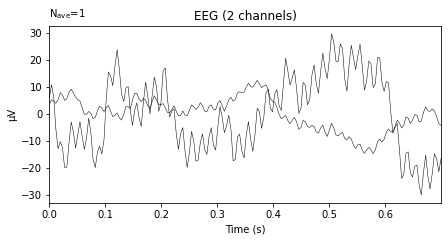

In [106]:
# Transform data with PCA into 2 principal components
pca = UnsupervisedSpatialFilter(PCA(2), average=False)
pca_data = pca.fit_transform(X)
ev = mne.EvokedArray(np.mean(pca_data, axis=0),
                     mne.create_info(2, epochs.info['sfreq'],
                                     ch_types='eeg'))
ev.plot(show=False, window_title="PCA", time_unit='s')

In [ ]:
# we can also read from the "data" variable above, but I kept this for now since we already have the entire dataframe printed

In [111]:
def bdf_to_df(file_name):
#     file_name = os.path.join('data', file_path)
    f = pyedflib.EdfReader(file_name)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    rec = pd.DataFrame(sigbufs).T
    rec.columns = signal_labels
    return rec

In [112]:
rec1 = bdf_to_df('eeg_recording_1.bdf')

In [113]:
rec1

,1A1,1A2,1A3,1A4,1A5,1A6,1A7,1A8,1A9,1A10,...,1EX8,Ana1-2,Ana3-4,Ana5-6,Ana7-8,Ana9-10,Ana11-12,Ana13-14,Ana15-16,Status
0,-18876.730746,-18592.168772,-16102.454623,-15834.736367,-12413.086440,-9622.435346,-3279.728316,-15042.894080,-10482.902506,-14128.927019,...,8637.437164,-1.017289e+06,52.213672,-143.289575,-274.896638,-574.827228,348.806402,485.658675,62.227253,3473408.0
1,-18882.855735,-18598.293761,-16107.892113,-15841.642605,-12419.711427,-9630.841581,-3288.322050,-15048.550320,-10487.714997,-14128.958269,...,9453.591906,-1.017446e+06,48.398974,-152.349481,-268.220917,-585.317647,347.375890,488.996535,62.227253,3473408.0
2,-18881.918237,-18599.512509,-16108.860861,-15843.142602,-12420.930175,-9633.029077,-3290.103297,-15048.050321,-10489.933743,-14133.770760,...,9719.872664,-1.017297e+06,43.630603,-146.150598,-266.790406,-586.748158,344.038030,483.751326,64.611439,3473408.0
3,-18873.762002,-18591.293774,-16098.454630,-15833.830119,-12411.117693,-9624.247843,-3280.290815,-15039.456587,-10483.215006,-14123.145780,...,8946.686593,-1.017093e+06,52.213672,-147.581109,-275.850312,-591.516530,349.760076,484.228163,66.995625,3473408.0
4,-18872.543254,-18589.731277,-16096.360884,-15829.517627,-12408.898947,-9618.935353,-3276.759571,-15038.737838,-10483.371255,-14120.302035,...,8556.812313,-1.017183e+06,49.352649,-143.766412,-270.605103,-581.979786,346.899053,488.519698,60.319904,3473408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155323,-11053.995201,-6929.909071,-7996.750850,-11346.400911,-8379.187643,-5647.255191,763.420463,-10365.496473,-7837.313645,-4376.351290,...,259042.755728,-1.012996e+06,45.061114,-148.057946,-283.956545,-584.363972,347.852728,489.473372,66.995625,3407872.0
1155324,-11054.463950,-6930.002821,-7996.594600,-11345.369663,-8378.437645,-5645.161445,764.357962,-10360.683982,-7840.782388,-4373.445045,...,259042.849478,-1.013243e+06,55.551532,-146.627435,-284.910219,-581.026112,342.130681,490.903884,60.796741,3407872.0
1155325,-11063.776433,-6939.784053,-8008.157079,-11351.932150,-8387.562628,-5654.098929,755.670478,-10365.027724,-7851.782368,-4377.757537,...,259042.505729,-1.013382e+06,63.180927,-144.720086,-271.558778,-585.317647,352.144262,494.718581,64.134602,3407872.0
1155326,-11067.088927,-6942.721548,-8012.813320,-11353.838397,-8388.562626,-5656.005175,752.732983,-10365.715223,-7856.563609,-4385.820022,...,259043.380727,-1.013225e+06,61.273578,-138.521203,-279.188173,-585.794484,352.144262,492.334395,64.611439,3407872.0


### Finding the stimulus channel

In [48]:
stim = mne.pick_types(data.info, meg=False, stim=True, eog=False)
stim 

array([264])

Column 264 in the data, `Status`, is the stimulus channel.

In [120]:
# values in the stimulus channel
set(rec1['Status'].values.tolist())

{3407872.0,
 3407873.0,
 3407874.0,
 3407876.0,
 3407877.0,
 3407878.0,
 3407879.0,
 3407880.0,
 3407881.0,
 3407882.0,
 3407883.0,
 3407884.0,
 3407885.0,
 3407886.0,
 3407887.0,
 3407888.0,
 3407889.0,
 3407890.0,
 3407891.0,
 3407893.0,
 3407894.0,
 3407895.0,
 3407896.0,
 3407897.0,
 3407898.0,
 3407902.0,
 3407972.0,
 3473408.0}

In [148]:
len(set(rec1['Status'].values.tolist()))

28

There are 28 unique values in the stimulus channel and since there are also 28 events in total, the `Status` channel is where our events are encoded.

In [135]:
data[264]

(array([[65536., 65536., 65536., ...,     0.,     0.,     0.]]),
 array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
        4.51298828e+03, 4.51299219e+03, 4.51299609e+03]))

#### Visualize the first 100 data points recorded in the first channel

In [127]:
y, x = data[0, 0:100]
y = y.T

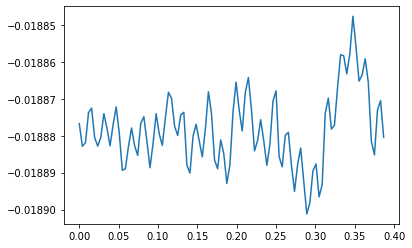

In [151]:
plt.figure()
plt.plot(x, y)
plt.show()

In [ ]:
 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)